In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import textblob
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from textblob import TextBlob

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_data = pd.read_csv('train/train.csv')

In [3]:
train_data.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0


In [4]:
#Analyzing the sentiment of Description and replacing that column values with sentiment values
l = []
z = []
for i in range(0,14993):
    temp = train_data['Description'][i]
    l.append(str(temp))
    z.append(TextBlob(l[i]).sentiment.polarity)
train_data['sentiment']=z     

In [5]:
train_data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'sentiment'],
      dtype='object')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [7]:
train_data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,sentiment
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,...,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441,0.201519
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,...,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265,0.181723
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000,0.070000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,0.193056
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000,0.316667
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000,1.000000


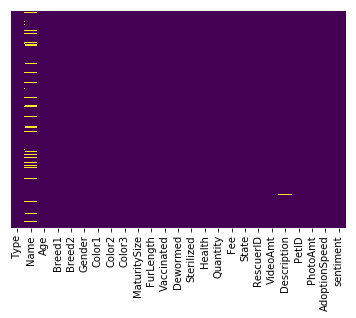

In [8]:
#This heatmap will be used to check the null values
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

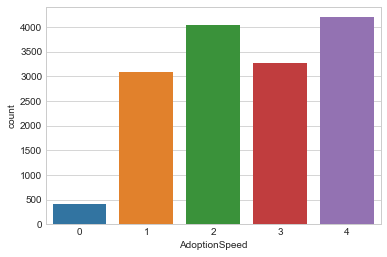

In [9]:
sns.set_style('whitegrid')
sns.countplot(x=train_data['AdoptionSpeed'],data=train_data)

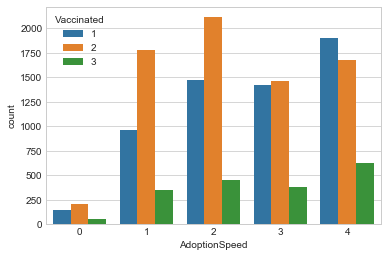

In [10]:
sns.set_style('whitegrid')
sns.countplot(x=train_data['AdoptionSpeed'],hue='Vaccinated',data=train_data)

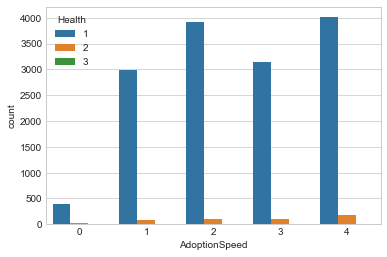

In [11]:
sns.set_style('whitegrid')
sns.countplot(x=train_data['AdoptionSpeed'],hue='Health',data=train_data)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


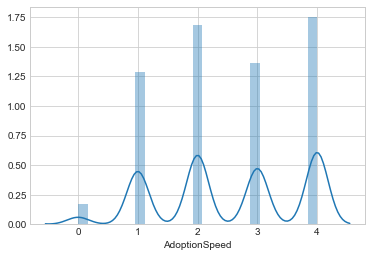

In [12]:
sns.distplot(train_data['AdoptionSpeed'])

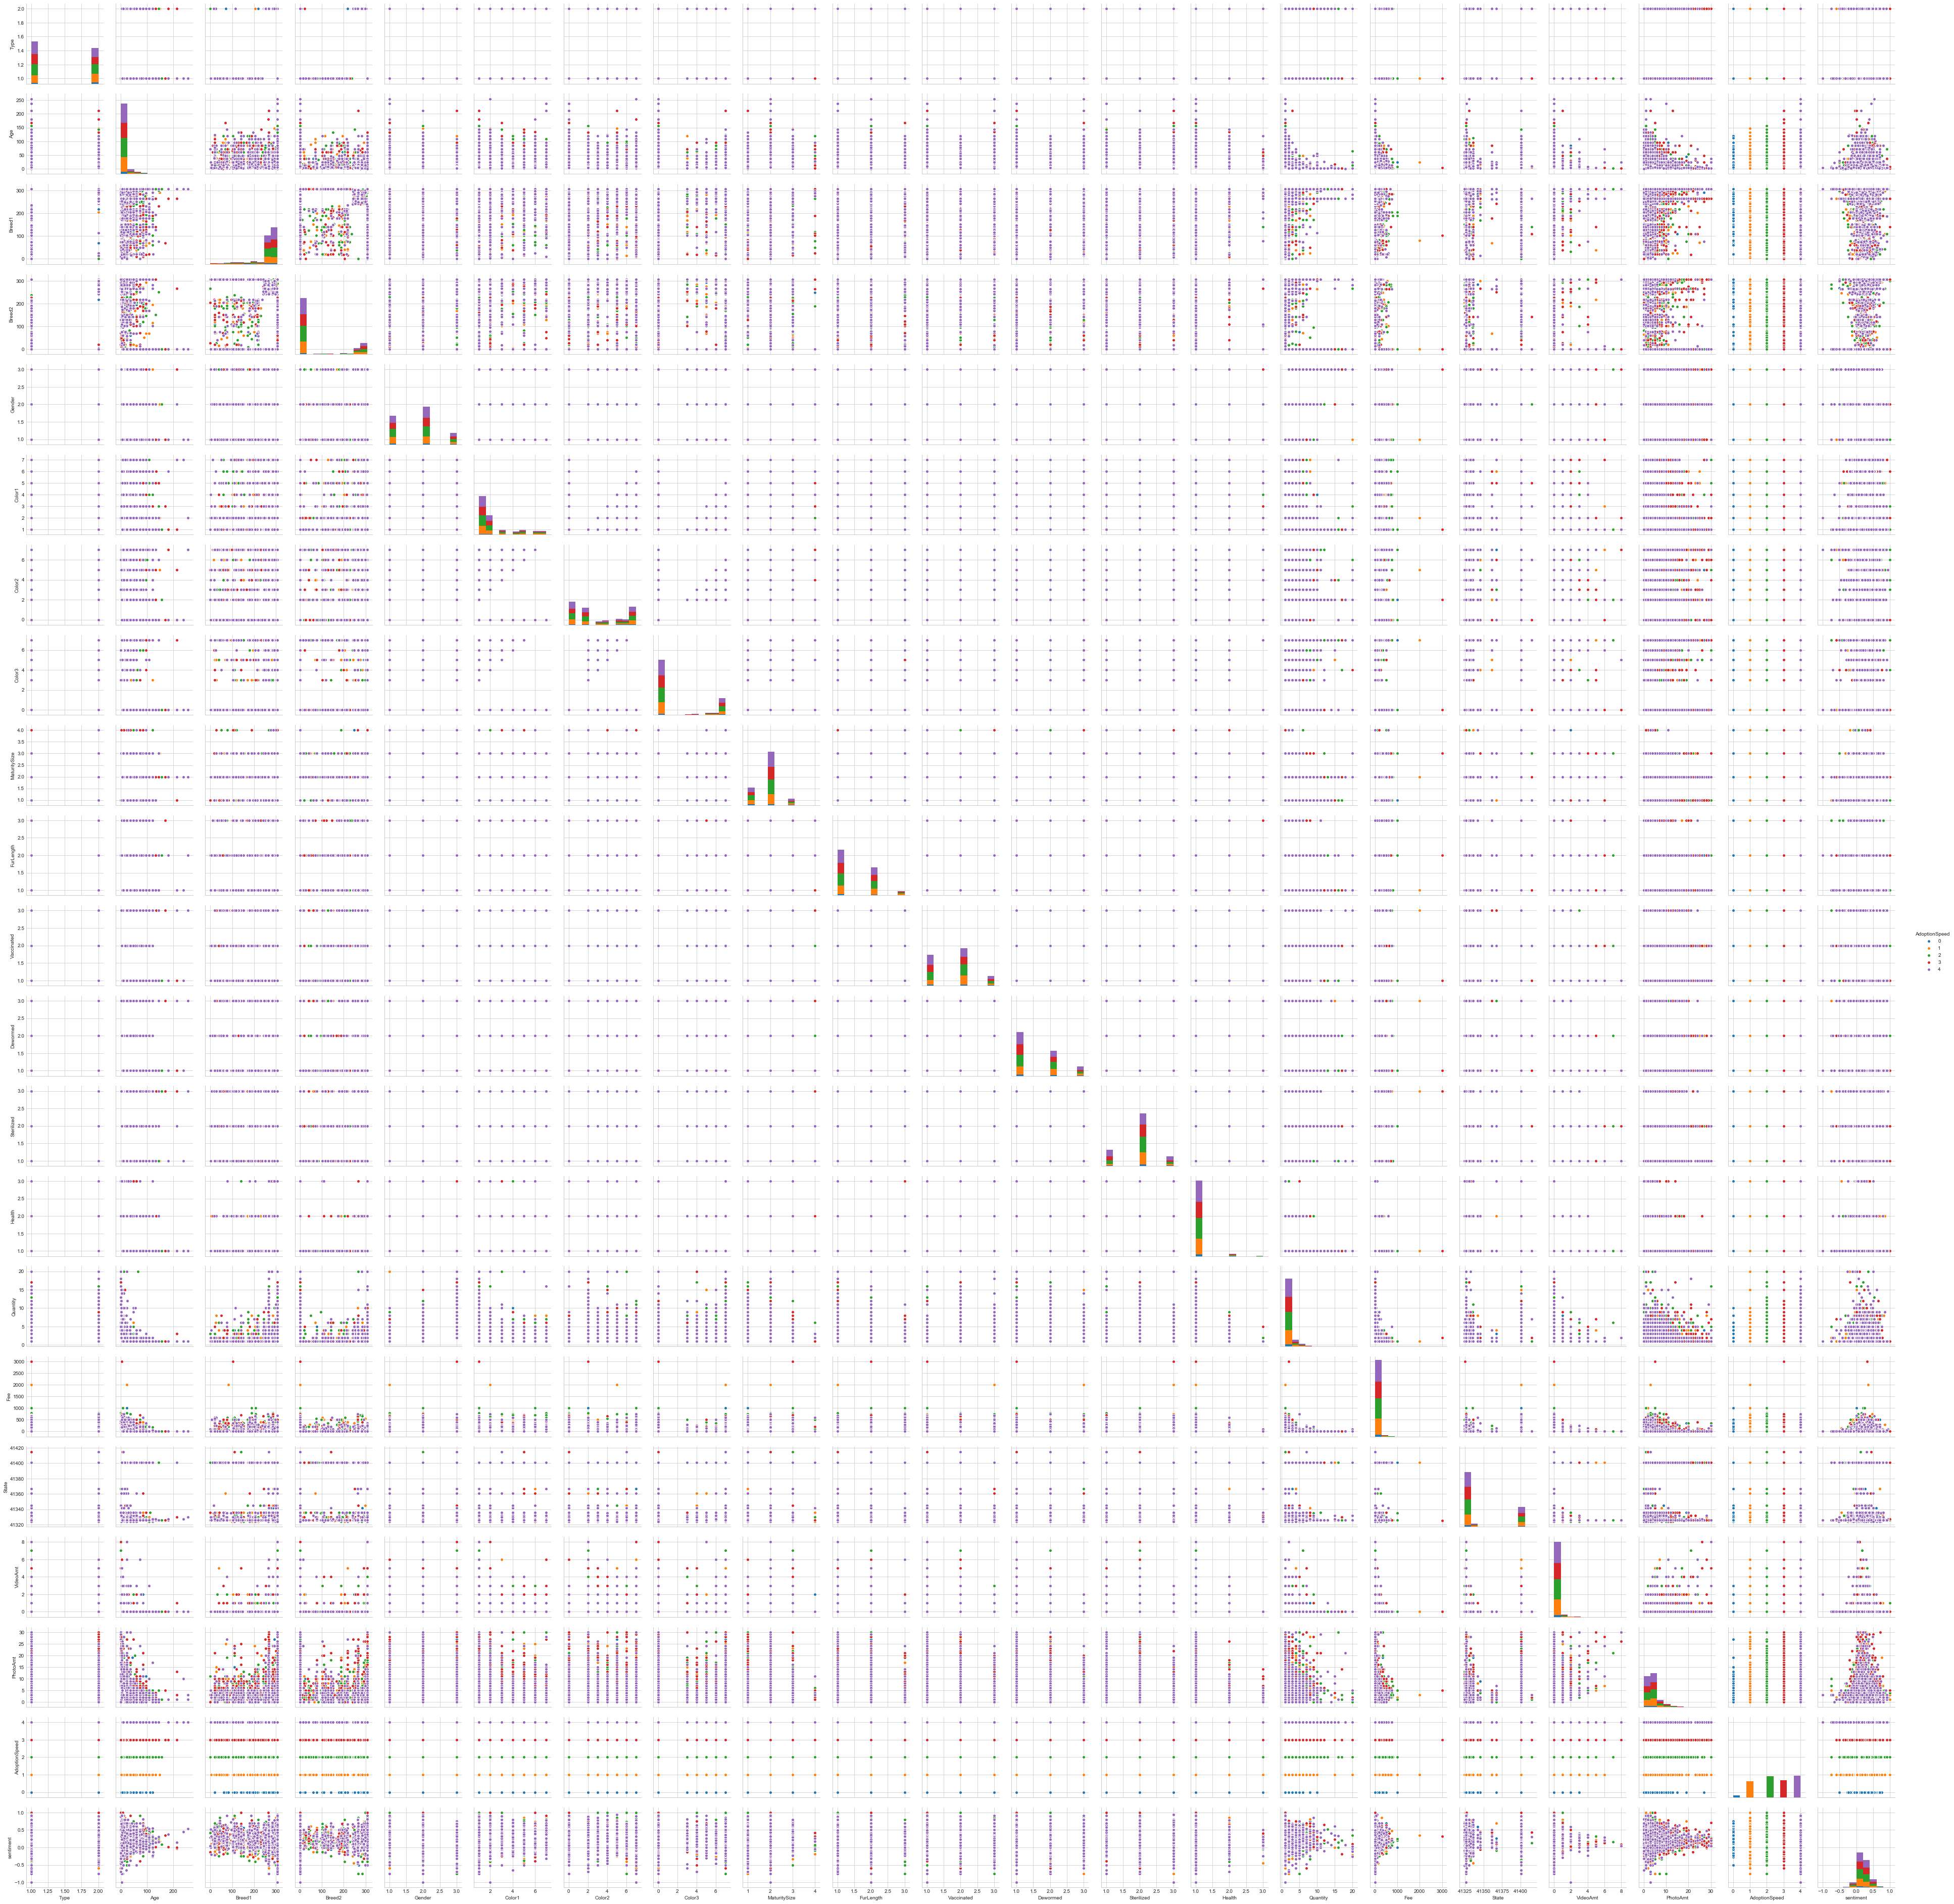

In [14]:
sns.pairplot(data=train_data,hue='AdoptionSpeed')

In [15]:
#To treat null values use this logic but debug it first
'''
def impute(cols):
    AdoptionSpeed[1]
    Description[0]
    
    if pd.isNull(Description):
        if AdoptionSpeed == 0:
            return 'Very Very Good Pet'
        elif AdoptionSpeed == 1:
            return 'Very Good Pet'
        elif AdoptionSpeed == 2:
            return 'Good Pet'
        elif AdoptionSpeed == 3:
            return 'Fair Pet'
        else:
            return 'Bad Pet'
    else:
        return Description
train_data['Description'] = train_data[['Description','AdoptionSpeed']].apply(impute,axis=1)
'''

"\ndef impute(cols):\n    AdoptionSpeed[1]\n    Description[0]\n    \n    if pd.isNull(Description):\n        if AdoptionSpeed == 0:\n            return 'Very Very Good Pet'\n        elif AdoptionSpeed == 1:\n            return 'Very Good Pet'\n        elif AdoptionSpeed == 2:\n            return 'Good Pet'\n        elif AdoptionSpeed == 3:\n            return 'Fair Pet'\n        else:\n            return 'Bad Pet'\n    else:\n        return Description\ntrain_data['Description'] = train_data[['Description','AdoptionSpeed']].apply(impute,axis=1)\n"

In [16]:
cleaned_train_data = train_data[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee',
       'VideoAmt',  'PhotoAmt',
       'sentiment','AdoptionSpeed']] 

In [17]:
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 20 columns):
Type             14993 non-null int64
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
sentiment        14993 non-null float64
AdoptionSpeed    14993 non-null int64
dtypes: float64(2), int64(18)
memory usage: 2.3 MB


In [18]:
sc = StandardScaler()

In [19]:
X = sc.fit_transform(cleaned_train_data)

In [20]:
y = train_data['AdoptionSpeed'].values

In [21]:
y_cat = to_categorical(y)

In [22]:
y_cat

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y_cat, test_size=0.2, random_state=42)

In [26]:
model = Sequential()
model.add(Dense(32,input_shape=(20,),activation = 'sigmoid'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(Adam(lr=0.007),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs = 20, verbose=2, validation_split=0.1)

Train on 10794 samples, validate on 1200 samples
Epoch 1/20
 - 5s - loss: 0.3947 - acc: 0.8346 - val_loss: 0.1507 - val_acc: 0.9642
Epoch 2/20
 - 3s - loss: 0.0602 - acc: 0.9839 - val_loss: 2.7566e-04 - val_acc: 1.0000
Epoch 3/20
 - 3s - loss: 0.1123 - acc: 0.9648 - val_loss: 0.0064 - val_acc: 0.9983
Epoch 4/20
 - 3s - loss: 0.0705 - acc: 0.9813 - val_loss: 0.0760 - val_acc: 0.9792
Epoch 5/20
 - 3s - loss: 0.0663 - acc: 0.9770 - val_loss: 8.1860e-04 - val_acc: 1.0000
Epoch 6/20
 - 3s - loss: 0.0423 - acc: 0.9900 - val_loss: 0.0411 - val_acc: 0.9942
Epoch 7/20
 - 3s - loss: 0.0361 - acc: 0.9885 - val_loss: 7.0599e-04 - val_acc: 1.0000
Epoch 8/20
 - 3s - loss: 0.0464 - acc: 0.9903 - val_loss: 0.2937 - val_acc: 0.9217
Epoch 9/20
 - 3s - loss: 0.0534 - acc: 0.9859 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 10/20
 - 3s - loss: 0.0026 - acc: 0.9994 - val_loss: 7.4826e-04 - val_acc: 1.0000
Epoch 11/20
 - 3s - loss: 0.0108 - acc: 0.9971 - val_loss: 0.0755 - val_acc: 0.9683
Epoch 12/20
 - 3s - 

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 32)                640       
_________________________________________________________________
dense_110 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_111 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_112 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_113 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_114 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_115 (Dense)            (None, 64)                8256      
__________

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([[1.5970771e-15, 4.4924805e-14, 5.8318024e-11, 6.4331575e-06,
        9.9999356e-01],
       [1.3616041e-15, 7.0743072e-06, 9.9998963e-01, 3.3442259e-06,
        5.6081099e-15],
       [1.6429028e-15, 4.5495546e-14, 6.0269026e-11, 6.7806354e-06,
        9.9999321e-01],
       ...,
       [9.0090054e-16, 4.3502482e-06, 9.9999058e-01, 5.1385905e-06,
        8.1562115e-15],
       [1.5942710e-15, 4.4933373e-14, 5.8135663e-11, 6.3911048e-06,
        9.9999356e-01],
       [1.9975178e-13, 7.9474344e-12, 8.9337609e-06, 9.9998689e-01,
        4.1477360e-06]], dtype=float32)

In [30]:

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [31]:
accuracy_score(y_test_class,y_pred_class)

0.9996665555185061

In [32]:
print(classification_report(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        92
          1       1.00      1.00      1.00       627
          2       1.00      1.00      1.00       806
          3       1.00      1.00      1.00       641
          4       1.00      1.00      1.00       833

avg / total       1.00      1.00      1.00      2999



In [33]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 92,   0,   0,   0,   0],
       [  0, 627,   0,   0,   0],
       [  0,   0, 806,   0,   0],
       [  0,   0,   1, 640,   0],
       [  0,   0,   0,   0, 833]], dtype=int64)